In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import yfinance as yf
from sklearn.linear_model import LinearRegression
from sklearn.isotonic import IsotonicRegression
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_diabetes
from scipy import linalg

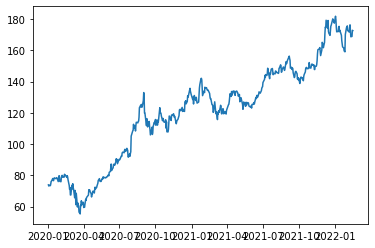

In [2]:
stock=yf.Ticker('AAPL').history(start='2020-1-1',end='2022-2-17')
plt.plot(stock['Close'])

In [3]:

y=stock['Close'].values
x=np.arange(1,538)
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.5,train_size=0.3,random_state=0)

In [4]:
clf=LinearRegression()
clf.fit(x_train.reshape(x_train.size,1),y_train.reshape(y_train.size,1))
predict_=clf.predict(x_test.reshape(x_test.size,1))
print(clf.score(x_train.reshape(x_train.size,1),y_train.reshape(y_train.size,1)))

0.9140055834111257


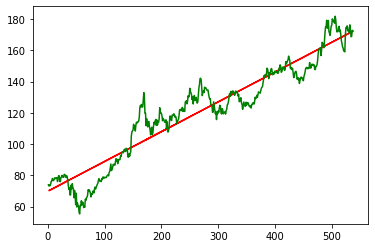

In [5]:
fig=plt.plot(x_test,predict_,color='red')
plt.plot(x,y,color='green')


In [6]:
import math
intervalo=stock-stock.shift(1)
stock['Close'].std()/math.sqrt(intervalo['Close'].mean())
class indicadores:
 def log_xVO(price): #volatilidad de parkinson con transformaciones de cierre y apertura
  dm=[]
  for i in range(1,price.index.size+1):
    dm.append(i)
  nm=1/2*np.log(price['High']/price['Low'])**2+2*np.log(2)-1*np.log(price['Close']/price['Open'])**2
  vlt=nm/dm
  return np.sqrt(vlt)

 def log_parkinson(precio): #volatilidad de parkinson
  n=[]
  for i in range(1,stock.index.size+1):
     n.append(i)
  nm=np.sqrt(1/np.array(n)*np.log(precio['High']/precio['Low'])**2)
  dm=np.sqrt(4*np.log(2))
  return nm/dm 
 def log_return(price): # rentabilidad logaritmica
     return np.log(price['Close']/price['Close'].shift(1))

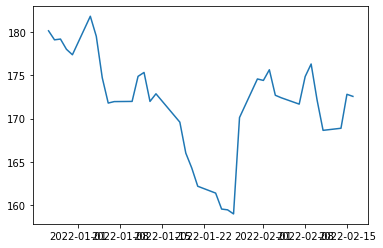

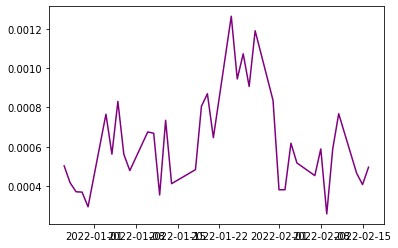

In [7]:

fig=plt.plot(stock['Close'][500:])
plt.show(fig)
t=indicadores.log_parkinson(stock)[500:]
plt.plot(t,color='purple')

In [8]:
from statsmodels.tsa.stattools import acovf
acov=stock['Close'].values
a=stock['Low'].values
autocov=acovf(acov,fft=True)
autocov2=acovf(a,fft=True)
plt.plot(autocov)
plt.plot(autocov2)
plt.show()

ModuleNotFoundError: No module named 'statsmodels'

In [ ]:
map.mro(autocov)